In [1]:
import requests
url = "https://worldpopulationreview.com/countries/cities/malaysia"
html = requests.get(url)
html.encoding = "utf-8"

from bs4 import BeautifulSoup
sp = BeautifulSoup(html.text, 'lxml')

In [2]:
block = sp.find_all("tr")[1:]
city = []
for i in block:
    city.append(i.find("th").text)
print(city)

['Kota Bharu', 'Kuala Lumpur', 'Klang', 'Kampung Baru Subang', 'Johor Bahru', 'Subang Jaya', 'Ipoh', 'Kuching', 'Petaling Jaya', 'Shah Alam', 'Kota Kinabalu', 'Sandakan', 'Seremban', 'Kuantan', 'Tawau', 'George Town', 'Kuala Terengganu', 'Sungai Petani', 'Miri', 'Taiping', 'Alor Setar', 'Bukit Mertajam', 'Sepang', 'Sibu', 'Malacca', 'Kulim', 'Kluang', 'Skudai', 'Batu Pahat', 'Bintulu', 'Kampung Pasir Gudang Baru', 'Kampung Sungai Ara', 'Tasek Glugor', 'Muar', 'Rawang', 'Butterworth', 'Lahad Datu', 'Semenyih', 'Port Dickson', 'Cukai', 'Putatan', 'Keningau', 'Ulu Tiram', 'Victoria', 'Taman Senai', 'Donggongon', 'Segamat', 'Kampong Baharu Balakong', 'Perai', 'Kangar', 'Kulai', 'Jitra', 'Teluk Intan', 'Semporna', 'Putra Heights', 'Temerluh', 'Kampong Dungun', 'Simpang Empat', 'Kuala Selangor', 'Kampung Bukit Baharu', 'Bandar Labuan', 'Kota Tinggi', 'Pontian Kechil', 'Putrajaya', 'Bentong Town', 'Banting', 'Bedong', 'Batu Gajah', 'Mentekab', 'Nibong Tebal', 'Raub', 'Kampong Pangkal Kalong',

In [3]:
pp = []
for i in block:
    temp = i.find("td").text
    temp = temp.replace(",", "")
    pp.append(int(temp))
print(pp)

[1459994, 1453975, 879867, 833571, 802489, 708296, 673318, 570407, 520698, 481654, 457326, 392288, 372917, 366229, 306462, 300000, 285065, 228843, 228212, 217647, 217368, 212329, 212050, 198239, 180671, 170889, 169828, 159733, 156236, 151617, 145639, 140849, 135786, 127897, 120447, 107591, 105622, 92491, 89198, 82425, 78340, 77650, 75350, 73653, 73176, 71585, 69816, 69302, 65301, 63869, 63762, 63489, 63353, 62641, 60000, 59916, 58674, 58004, 55887, 55656, 54752, 52743, 50836, 50000, 49213, 48240, 47585, 46183, 42171, 40072, 40024, 39904, 39595, 39331, 38643, 37716, 36720, 35109, 33606, 32393, 31826, 31273, 30280, 30212, 30016, 29281, 29185, 29116, 28484, 28238, 27863, 27313, 27207, 27191, 27138, 26939, 26199, 26044, 25028, 24857, 24401, 24071, 23307, 23292, 23288, 22579, 22340, 22007, 21906, 21410, 21185, 21044, 20476, 20163, 20001, 20000, 20000, 19731, 19510, 19294, 19278, 19233, 19231, 19056, 19017, 17528, 17441, 17391, 17251, 17131, 16393, 16317, 15964, 15855, 15771, 15716, 15497, 1

In [4]:
hc = []
lc = []
hp = []
lp = []
for i in range(len(block)):
    if pp[i] > 100000:
        hc.append(city[i])
        hp.append(pp[i])
    else:
        lc.append(city[i])
        lp.append(pp[i])

In [5]:
import pandas as pd
df1 = pd.DataFrame({
    'City': hc[:10],
    '2024 Population' : hp[:10]
})
df1

,City,2024 Population
0,Kota Bharu,1459994
1,Kuala Lumpur,1453975
2,Klang,879867
3,Kampung Baru Subang,833571
4,Johor Bahru,802489
5,Subang Jaya,708296
6,Ipoh,673318
7,Kuching,570407
8,Petaling Jaya,520698
9,Shah Alam,481654


In [6]:
import pandas as pd
df2 = pd.DataFrame({
    'City': lc[:10],
    '2024 Population' : lp[:10]
})
df2

,City,2024 Population
0,Semenyih,92491
1,Port Dickson,89198
2,Cukai,82425
3,Putatan,78340
4,Keningau,77650
5,Ulu Tiram,75350
6,Victoria,73653
7,Taman Senai,73176
8,Donggongon,71585
9,Segamat,69816


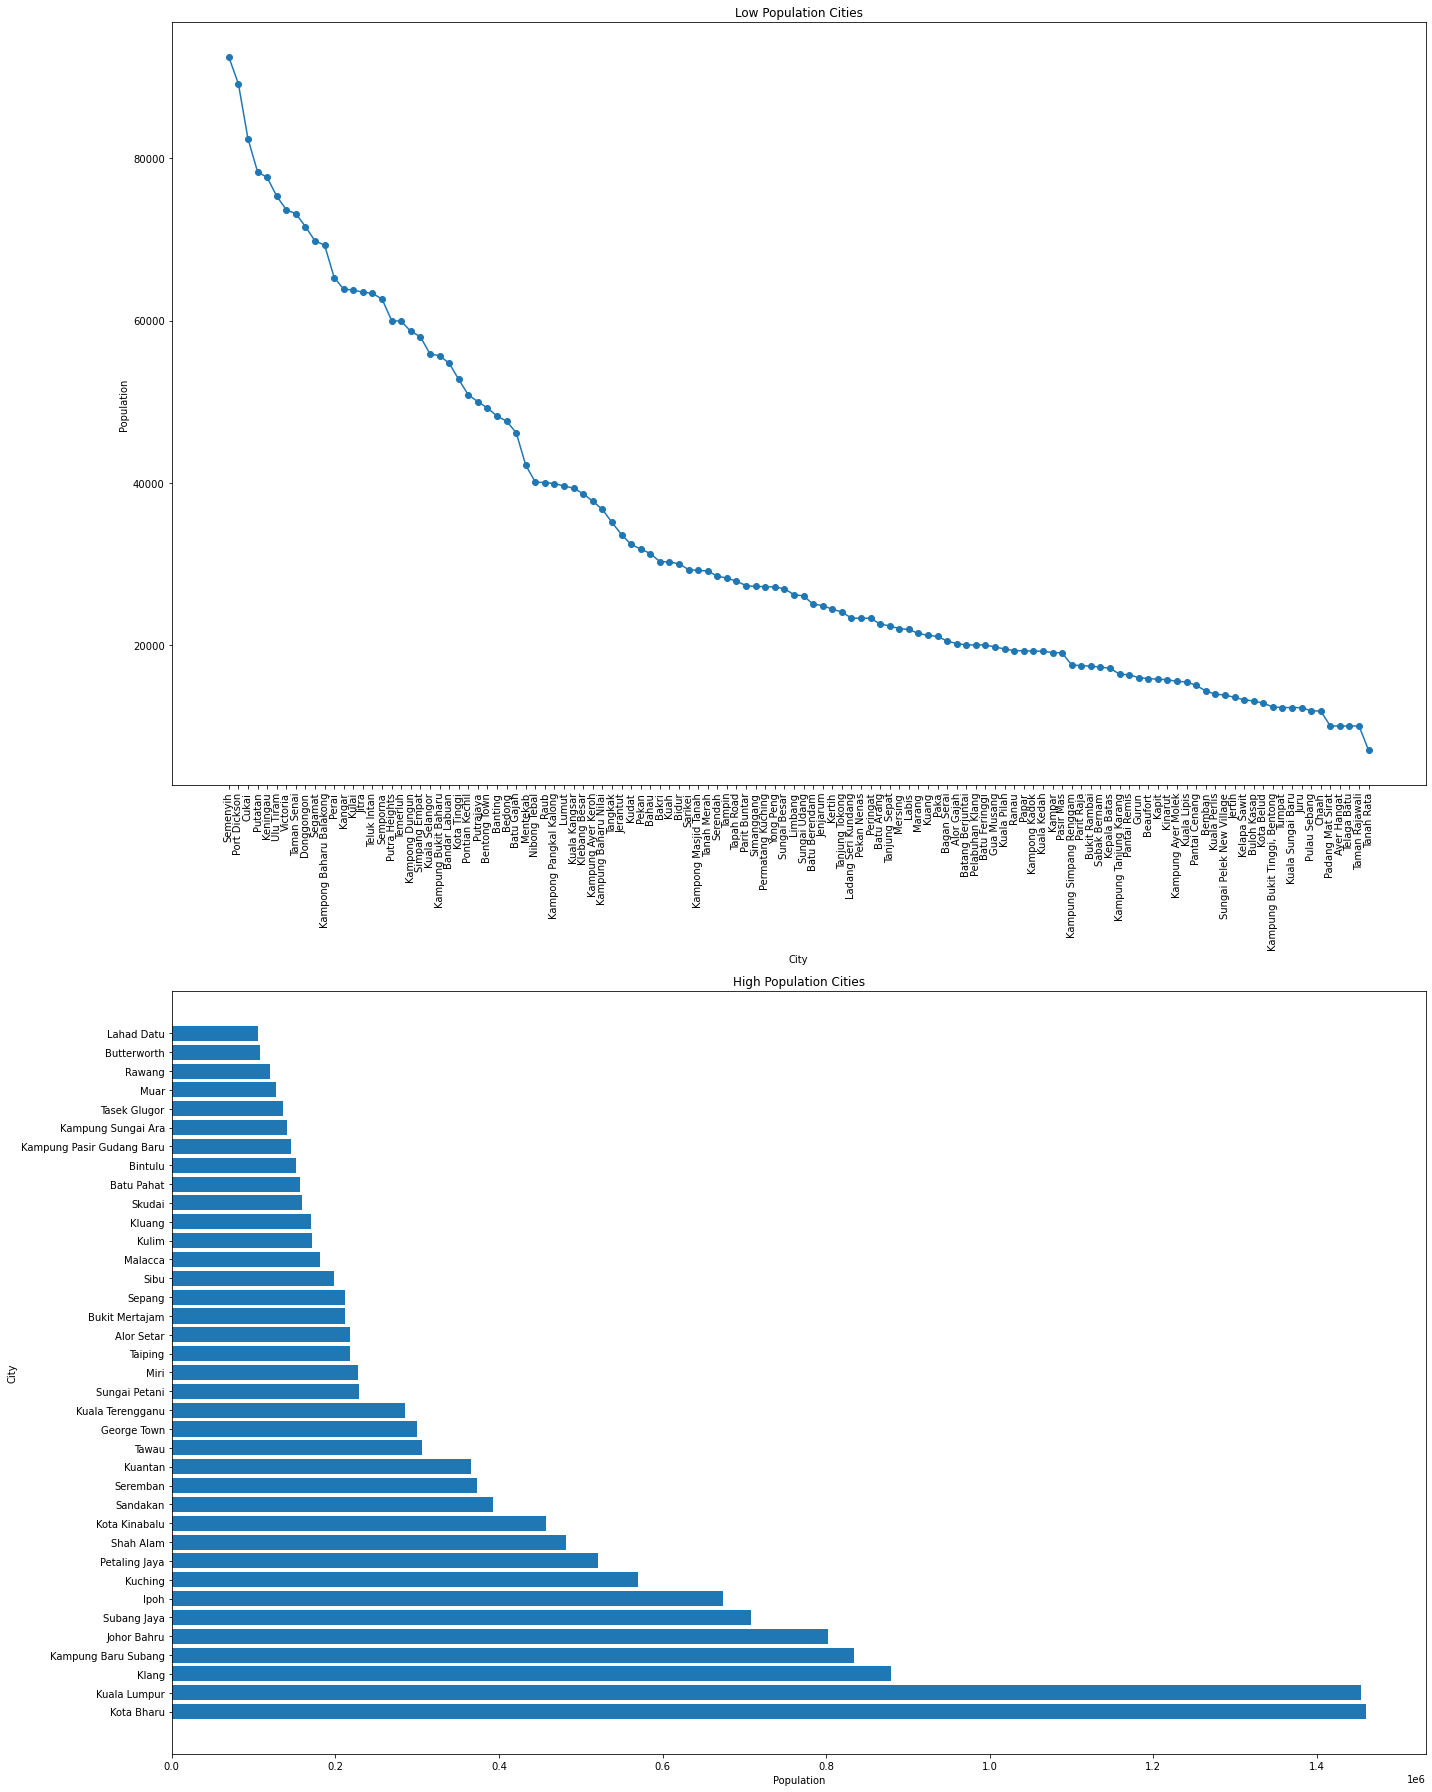

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 25))

# Photo1
plt.subplot(2, 1, 1)
plt.plot(lc, lp, linestyle='-', marker='o')
plt.title('Low Population Cities')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=90)

# Photo2
plt.subplot(2, 1, 2)
plt.barh(hc, hp)
plt.title('High Population Cities')
plt.xlabel('Population')
plt.ylabel('City')

plt.tight_layout()
plt.show()